In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
n_classes = 3

In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import re

In [114]:
df = pd.read_csv("../../usa-labelled.csv")
df

,Text,new_text,languages,new_text_after_translation,pos_tagged_words,words_processed_all,words_processed_noun_adj_verb_adv,words_processed_noun,scores,compound,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may 1...,ENGLISH,cher i got my second pfizer vaccine shot may 1...,"[('cher', 'NN'), ('i', 'NN'), ('got', 'VBD'), ...","['cher', 'get', 'second', 'pfizer', 'vaccine',...","['cher', 'get', 'second', 'pfizer', 'vaccine',...","['cher', 'pfizer', 'vaccine', 'cher', 'guess',...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp'ed by pfizer april relieved_face,ENGLISH,syringedp'ed by pfizer april relieved_face,"[('syringe', 'NN'), ('ed', 'NN'), ('by', 'IN')...","['syringe', 'ed', 'pfizer', 'april']",['syringe'],['syringe'],"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs_upmedium-light_skin_tone double shot pf...,ENGLISH,thumbs_upmedium-light_skin_tone double shot pf...,"[('double', 'RB'), ('shot', 'JJ'), ('pfizer', ...","['double', 'shot', 'pfizer']","['double', 'shot', 'pfizer']","['shot', 'pfizer']","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,couple things. my wife has ra. takes plaquenil...,couple things. my wife has ra. takes plaquenil...,ENGLISH,couple things. my wife has ra. takes plaquenil...,"[('couple', 'NN'), ('things', 'NNS'), ('my', '...","['couple', 'thing', 'wife', 'ra', 'take', 'pla...","['couple', 'thing', 'wife', 'take', 'plaquenil...","['couple', 'thing', 'wife', 'plaquenil', 'prob...","{'neg': 0.056, 'neu': 0.887, 'pos': 0.057, 'co...",0.0150,neutral
4,"great, me too back april. pfizer 2 shots","great, me too back april. pfizer 2 shots",ENGLISH,"great, me too back april. pfizer 2 shots","[('great', 'JJ'), ('me', 'PRP'), ('too', 'RB')...","['great', 'back', 'april', 'pfizer', 'two', 's...","['great', 'pfizer', 'shot']","['pfizer', 'shot']","{'neg': 0.0, 'neu': 0.594, 'pos': 0.406, 'comp...",0.6249,positive
...,...,...,...,...,...,...,...,...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we‚Äö√Ñ√¥re at north high school today until 5...,ENGLISH,we‚Äö√Ñ√¥re at north high school today until 5...,"[('we', 'PRP'), ('i', 'VBP'), ('re', 'VBP'), (...","['north', 'high_school', 'today', 'come', 'get...","['north', 'today', 'come', 'get', 'free', 'pfi...","['north', 'today', 'pfizer', 'vaccine', 'year'...","{'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'comp...",0.5106,positive
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,ENGLISH,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,"[('y', 'NN'), ('i', 'NN'), ('all', 'DT'), ('pl...","['please', 'get', 'vaccinated', 'disclaimer', ...","['get', 'vaccinated', 'disclaimer', 'pfizer', ...","['disclaimer', 'pfizer', 'stock']","{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.3182,positive
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,ENGLISH,disappointed you are blame only unvaccinated c...,"[('disappointed', 'VBN'), ('you', 'PRP'), ('ar...","['disappointed', 'blame', 'vaccinated', 'crowd...","['disappointed', 'blame', 'vaccinated', 'crowd...","['blame', 'delta', 'covid', 'case', 'vaccine']","{'neg': 0.174, 'neu': 0.727, 'pos': 0.099, 'co...",-0.4753,negative
1497,"be fair, cdc et al have always said pfizer or ...","be fair, cdc et al have always said pfizer or ...",ENGLISH,"be fair, cdc et al have always said pfizer or ...","[('be', 'VB'), ('fair', 'JJ'), ('cac', 'JJ'), ...","['fair', 'cac', 'et_al', 'always', 'say', 'pfi...","['fair', 'cac', 'et_al', 'always', 'say', 'pfi...","['cac', 'et_al', 'pfizer', 'vaccination', 'cha...","{'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'comp...",0.5106,positive


In [115]:
# Drop columns not used for modelling
cols_to_drop = ['languages', 'new_text', 'pos_tagged_words','words_processed_all', 'words_processed_noun_adj_verb_adv', 'words_processed_noun', 'scores','compound']
df.drop(cols_to_drop, axis=1, inplace=True)
            

In [116]:
df

,Text,new_text_after_translation,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may 1...,neutral
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp'ed by pfizer april relieved_face,neutral
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs_upmedium-light_skin_tone double shot pf...,neutral
3,couple things. my wife has ra. takes plaquenil...,couple things. my wife has ra. takes plaquenil...,neutral
4,"great, me too back april. pfizer 2 shots","great, me too back april. pfizer 2 shots",positive
...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we‚Äö√Ñ√¥re at north high school today until 5...,positive
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,positive
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,negative
1497,"be fair, cdc et al have always said pfizer or ...","be fair, cdc et al have always said pfizer or ...",positive


In [117]:
# Helper function to remove unwanted patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Remove Twitter handles from the data 
df['new_text_after_translation'] = np.vectorize(remove_pattern)(df['new_text_after_translation'], "@[\w]*")

# Remove punctuations, numbers, and special characters
df['new_text_after_translation'] = df['new_text_after_translation'].str.replace("[^a-zA-Z]", " ")

/var/folders/d0/5_1bb8ld291843m4x7vj7vnw0000gn/T/ipykernel_44440/4090771562.py:12: FutureWarning:

The default value of regex will change from True to False in a future version.



In [118]:
def sentiment2target(sentiment):
    return {
        'negative': 0,
        'neutral': 1,
        'positive' : 2
    }[sentiment]
targets = df.sentiment.apply(sentiment2target)

In [119]:
df['sentiment'] =targets

In [120]:
df

,Text,new_text_after_translation,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may ...,1
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp ed by pfizer april relieved face,1
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs upmedium light skin tone double shot pf...,1
3,couple things. my wife has ra. takes plaquenil...,couple things my wife has ra takes plaquenil...,1
4,"great, me too back april. pfizer 2 shots",great me too back april pfizer shots,2
...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we re at north high school today until ...,2
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y all please get vaccinated d...,2
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,0
1497,"be fair, cdc et al have always said pfizer or ...",be fair cdc et al have always said pfizer or ...,2


In [121]:
df['sentiment'].value_counts()

2    643
0    463
1    393
Name: sentiment, dtype: int64

In [122]:
# Plot a funnel chart

plt.style.use('seaborn')
from plotly import graph_objs as go
import plotly.express as px

temp = df.groupby('sentiment').count()['new_text_after_translation'].reset_index()
# temp['label'] = temp['negative'].apply(lambda x : 'Xenophobic Tweet' if x==1 else 'Non Xenophobic Tweet')

# fig = go.Figure(go.Funnelarea(
#     text = temp.label,
#     values = temp.text,
#     title = {"position" : "top center", "text" : "Funnel Chart for target distribution"}
#     ))
# fig.show()


In [123]:
temp

,sentiment,new_text_after_translation
0,0,463
1,1,393
2,2,643


In [124]:
temp['label'] = temp['sentiment'].apply(lambda x : 'Neutral Tweet' if x==1 else ('Positive Tweet' if x == 2 else 'Negative Tweet'))


In [125]:
df

,Text,new_text_after_translation,sentiment
0,cher i got my second pfizer vaccine shot may 1...,cher i got my second pfizer vaccine shot may ...,1
1,Ô£ø√º√≠√¢dp'ed by pfizer april Ô£ø√º√≤√•,syringedp ed by pfizer april relieved face,1
2,Ô£ø√º√´√ßÔ£ø√º√®¬∫ double shot pfizer,thumbs upmedium light skin tone double shot pf...,1
3,couple things. my wife has ra. takes plaquenil...,couple things my wife has ra takes plaquenil...,1
4,"great, me too back april. pfizer 2 shots",great me too back april pfizer shots,2
...,...,...,...
1494,we‚Äö√Ñ√¥re at north high school today until 5...,we re at north high school today until ...,2
1495,y‚Äö√Ñ√¥all please get vaccinated. . . . . * d...,y all please get vaccinated d...,2
1496,disappointed you are blame only unvaccinated c...,disappointed you are blame only unvaccinated c...,0
1497,"be fair, cdc et al have always said pfizer or ...",be fair cdc et al have always said pfizer or ...,2


In [126]:
X = df
y = X['sentiment']
X.drop(['sentiment'], axis=1, inplace=True)

# Split the data using stratify 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)
X_test_stats = X_test.copy()
# Reset the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train.drop(['Text'], axis=1, inplace=True)
X_test.drop(['Text'], axis=1, inplace=True)



In [128]:
X_test

,new_text_after_translation
0,alright australia targets set eligible p...
1,source fauci delivery is bowery boys podcast ...
2,while data suggest pfizer biontech s vac...
3,it is not this is select information not pri...
4,bs pfizer used no federal money it was first a...
...,...
370,i hate needles too i had get pfizer one that s...
371,i got pfizer i was lethargic as hell nd shot...
372,x dosed serum shows very high cross neutraliz...
373,did you know after getting pfizer one side eff...


In [95]:
X_test_stats

,Text,new_text_after_translation
0,fda is aiming give full approval pfizer/bionte...,fda is aiming give full approval pfizer bionte...
1,i think getting pfizer vaccine makes sense. ch...,i think getting pfizer vaccine makes sense ch...
2,so we‚Äö√Ñ√¥ve all heard anecdotes awful side ...,so we ve all heard anecdotes awful side ...
3,don‚Äö√Ñ√¥t disagree with you that 1/3 country...,don t disagree with you that country...
4,co-worker: ‚Äö√Ñ√∫where did you get your vacci...,co worker where did you get your vacci...
...,...,...
370,at this point i think any non-peer-reviewed ef...,at this point i think any non peer reviewed ef...
371,sorry but epoch times is bs just as numbers th...,sorry but epoch times is bs just as numbers th...
372,"my husband &amp; i are healthy, had covid last...",my husband amp i are healthy had covid last...
373,got my second pfizer dose weekend Ô£ø√º√¥√á #f...,got my second pfizer dose weekend slightly smi...


In [131]:
# Convert the text feature into a vectors of tokens
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',
                             lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train.new_text_after_translation)
X_test_cv = cv.transform(X_test.new_text_after_translation)


In [132]:
import scipy.sparse as sp
train_count = sp.csr_matrix(X_train_cv)

In [133]:
X_train = sp.hstack([train_count])

In [134]:
X_train

<1124x4001 sparse matrix of type '<class 'numpy.int64'>'
	with 15759 stored elements in Compressed Sparse Row format>

In [135]:
test_count = sp.csr_matrix(X_test_cv)
X_test = sp.hstack([test_count])

In [136]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
n_classes = 3

clf = SGDClassifier(alpha=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [137]:
# Plot scores and make a confusion matrix for non-xenophobic/xenophobic predictions

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
n_classes = 3

cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
print("Accuracy score ={:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred, average="macro")*100))
print(f'Number of samples to classify: {len(X_test.toarray())}\n')
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, average='micro'))
print(f'Confusion matrix: \n{cm}')

Accuracy score =48.53%
F1 score =47.49%
Number of samples to classify: 375

Accuracy score: 0.48533333333333334
Precision Score :  0.48533333333333334
Recall Score :  0.48533333333333334
Confusion matrix: 
[[43 30 43]
 [17 51 30]
 [37 36 88]]


Text(38.32000000000001, 0.5, 'True label')

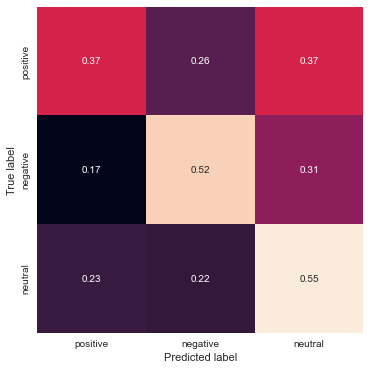

In [138]:
# Normalize the confusion matrix and plot it

labels = ['positive', 'negative', 'neutral']
plt.figure(figsize=(6,6))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, square=True, annot=True, cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [139]:
# Show how the first 50 test tweets were classified and their true label
testing_predictions = []
for i in range(len(X_test.toarray())):
    if y_pred[i] == 0:
        testing_predictions.append('Negative') 
    else:
        if y_pred[i] == 1:
            testing_predictions.append('Neutral')
        else:
            testing_predictions.append('Positive')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'text':list(X_test_stats.Text)})
check_df.replace(to_replace=0, value='Negative', inplace=True)
check_df.replace(to_replace=1, value='Neutral', inplace=True)
check_df.replace(to_replace=2, value='Positive', inplace=True)
check_df.iloc[:50]


,actual_label,prediction,text
0,Positive,Neutral,"alright, australia. targets set 80% eligible p..."
1,Neutral,Neutral,source fauci delivery is bowery boys' podcast ...
2,Negative,Positive,while data suggest pfizer biontech‚Äö√Ñ√¥s vac...
3,Positive,Positive,"it is not. this is select information, not pri..."
4,Positive,Positive,bs pfizer used no federal money it was first a...
5,Negative,Positive,got mfs mixing astra-zentica pfizer together l...
6,Positive,Neutral,this is about zillionth set effectiveness stat...
7,Negative,Neutral,my ex sister law. she's pretty high up food ch...
8,Neutral,Negative,"- whats up, i got moderna first time - but i'm..."
9,Positive,Negative,vaccine is made prevent you getting it or if y...


In [130]:
X_test

,new_text_after_translation
0,alright australia targets set eligible p...
1,source fauci delivery is bowery boys podcast ...
2,while data suggest pfizer biontech s vac...
3,it is not this is select information not pri...
4,bs pfizer used no federal money it was first a...
...,...
370,i hate needles too i had get pfizer one that s...
371,i got pfizer i was lethargic as hell nd shot...
372,x dosed serum shows very high cross neutraliz...
373,did you know after getting pfizer one side eff...


In [142]:
misclassified = check_df[check_df['actual_label'] != check_df['prediction']]

In [145]:
misclassified=misclassified.reset_index()
misclassified

,index,actual_label,prediction,text
0,0,Positive,Neutral,"alright, australia. targets set 80% eligible p..."
1,2,Negative,Positive,while data suggest pfizer biontech‚Äö√Ñ√¥s vac...
2,5,Negative,Positive,got mfs mixing astra-zentica pfizer together l...
3,6,Positive,Neutral,this is about zillionth set effectiveness stat...
4,7,Negative,Neutral,my ex sister law. she's pretty high up food ch...
...,...,...,...,...
188,369,Neutral,Positive,"as said, we need that third pfizer jawn yester..."
189,370,Positive,Negative,i hate needles too i had get pfizer one that's...
190,371,Negative,Positive,i got pfizer. i was lethargic as hell 2nd shot...
191,372,Negative,Neutral,3x dosed serum shows very high cross neutraliz...


In [162]:
misclassified.iloc[190]['text']

'i got pfizer. i was lethargic as hell 2nd shot day 2. my wife got moderna she gad achy muscles sickness 2nd shot day 2 about 8 hours. thats it. you can tell how you will react by 1st shot. no side effects = less day 2 drink. hella. water.'

In [155]:
misclassified.iloc[50:70]

,index,actual_label,prediction,text
50,93,Negative,Neutral,fighting stigma : jury munster child abuse tri...
51,95,Neutral,Positive,this can‚Äö√Ñ√¥t be real.Ô£ø√º√´√Ñ right #covi...
52,97,Positive,Neutral,thinking about getting third pfizer shot i‚Äö√...
53,98,Neutral,Positive,last child fully vaxxed. believe they are stil...
54,100,Neutral,Negative,#covid19 update triple mask mandate coming. un...
55,102,Positive,Neutral,i was curious since i am 6 months post 2nd dos...
56,105,Neutral,Negative,6 fully vaccinated people who attended outdoor...
57,108,Negative,Neutral,meanwhile i just seen tiktok video someone who...
58,111,Negative,Neutral,pfizer will have full auth month so not surpri...
59,118,Positive,Negative,if anyone 12+ needs 1st or 2nd dose pfizer tod...
